In [1]:
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
import scvelo as scv
import anndata
import splicejac as sp

In [2]:
adata = anndata.read("cancer_loom.h5ad")
adata

AnnData object with n_obs × n_vars = 52799 × 32285
    obs: 'TS_Present', 'RNA_Present', 'MULTI', 'TS_UMI', 'NUM_INTBC', 'Lane', 'Tumor', 'SubTumor', 'ES_clone', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'n_counts', 'leiden_sub', 'Cluster-Name'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'Cluster-Name_colors', 'Lane_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [3]:
adata.obs['clusters']=adata.obs['Cluster-Name']

In [4]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
sc.pp.log1p(adata)

Filtered out 20091 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [5]:
sp.tl.estimate_jacobian(adata, n_top_genes=50)

Filtered out 42 genes that are detected 20 counts (shared).
Extracted 50 highly variable genes.
Logarithmized X.


/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/splicejac/tools/estimate_jacobian.py:300: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata)
/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is depre

computing neighbors
    finished (0:00:32) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Running quick regression...
Running subset regression on the Mesenchymal-1 cluster...
Running subset regression on the Gastric-like cluster...
Running subset regression on the AT1-like cluster...
Running subset regression on the Late Gastric cluster...
Running subset regression on the Early gastric cluster...
Running subset regression on the Mesenchymal-2 (Met) cluster...
Running subset regression on the Mesenchymal-1 (Met) cluster...
Running subset regression on the Endoderm-like cluster...
Running subset regression on the Early EMT-1 cluster...
Running subset regression on the High plasticity cluster...
Running subset regression o

In [6]:
adata

AnnData object with n_obs × n_vars = 52799 × 50
    obs: 'TS_Present', 'RNA_Present', 'MULTI', 'TS_UMI', 'NUM_INTBC', 'Lane', 'Tumor', 'SubTumor', 'ES_clone', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'n_counts', 'leiden_sub', 'Cluster-Name', 'clusters', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'Cluster-Name_colors', 'Lane_colors', 'log1p', 'pca', 'neighbors', 'axes', 'degr_rates', 'all_cells', 'jacobian_lists', 'average_jac', 'inst_scores'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [19]:
adata.uns['jacobian_lists']['Mesenchymal-1'][0]

[array([[-1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          8.37344793e-04, -1.40210395e-04,  9.58231837e-03],
        [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00, ...,
         -6.87138587e-02,  3.47355235e-04,  2.09195480e-01],
        [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00, ...,
          6.27165020e-04,  3.32231903e-05,  9.72019415e-03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -6.68401197e-02,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00, -8.64715576e-02,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00, -1.24450512e-02]]),
 array([[-1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          7.33554887e-04, -1.56596652e-04,  4.16624919e-03],
        [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00, ...,
         -6.55285269e-02,  5.35503263e

In [21]:
adata.uns['average_jac']['Mesenchymal-1']

[array([[-1.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.01085801],
        [ 0.        , -1.        ,  0.        , ..., -0.06953337,
          0.        ,  0.20134596],
        [ 0.        ,  0.        , -1.        , ...,  0.        ,
          0.        ,  0.01108629],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.06684012,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         -0.08647156,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.01244505]]),
 array([-2.36540277e+00+0.00000000e+00j, -2.14405189e+00+0.00000000e+00j,
        -4.86887069e-01+4.22293932e-02j, -4.86887069e-01-4.22293932e-02j,
        -5.64048098e-01+0.00000000e+00j, -3.00799070e-01+0.00000000e+00j,
        -2.31470559e-01+0.00000000e+00j, -1.59499937e-01+0.00000000e+00j,
        -8.05248563e-01+0.00000000e+00j, -1.13258981e+00+0.00000000e+00j,
   

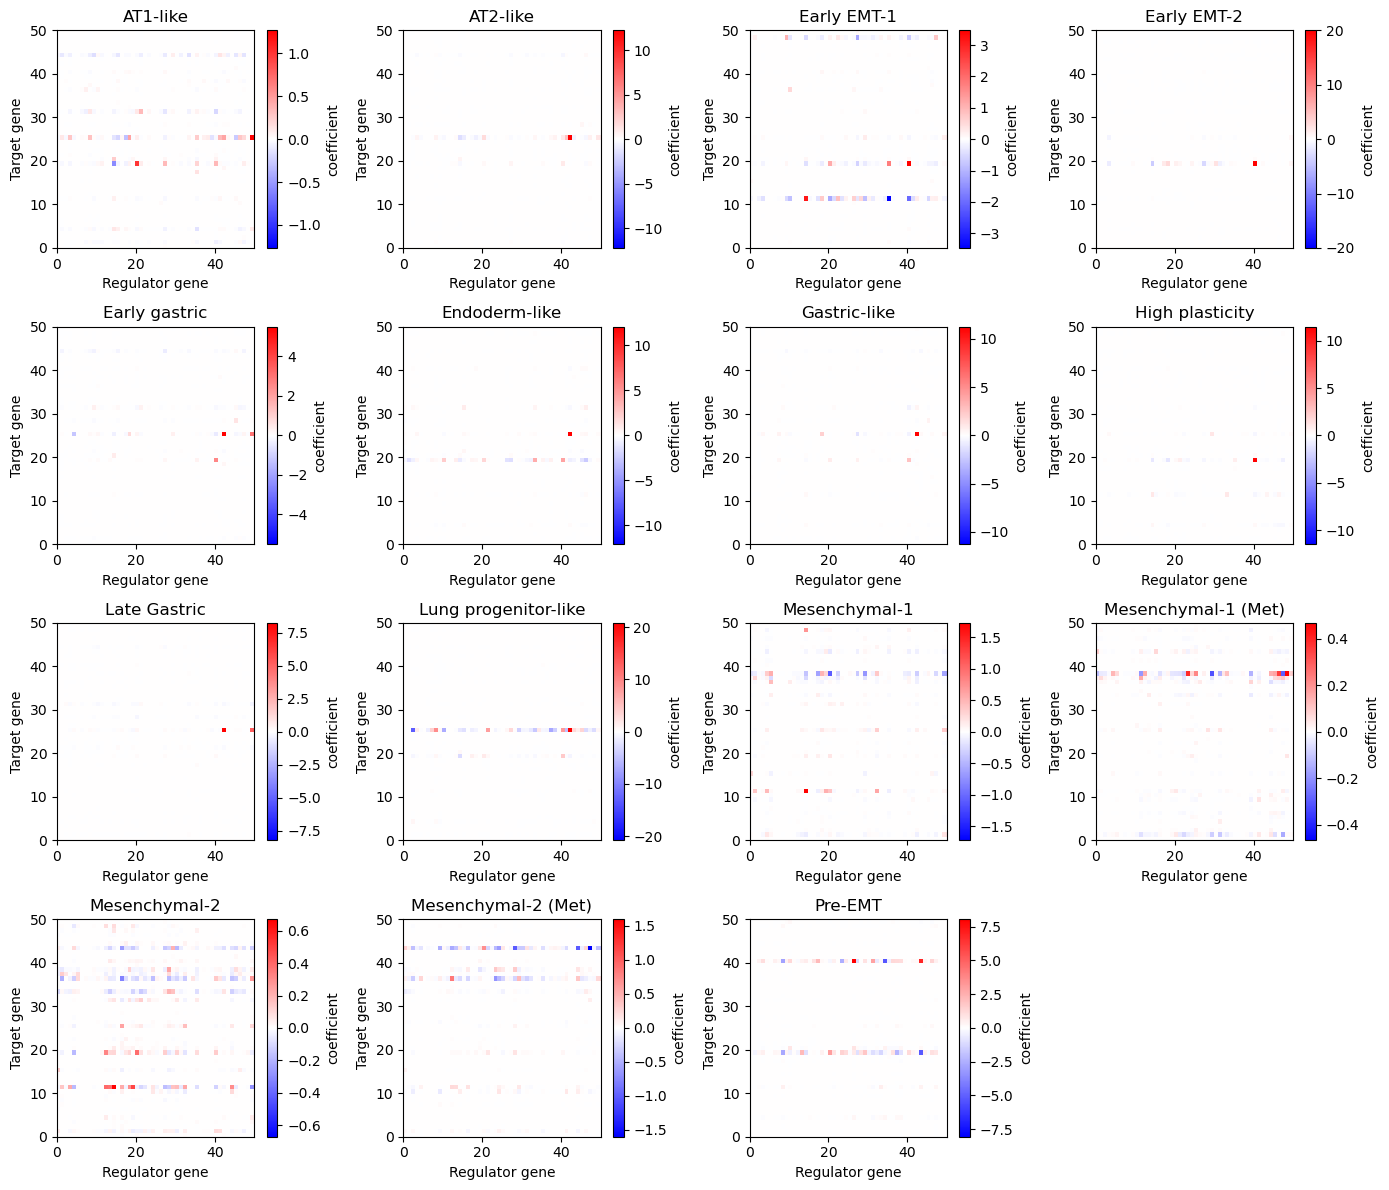

In [36]:
sp.pl.visualize_jacobian(adata,
                         panel_height=3,
                         panel_length=3.5,
                         pan_per_row=4,
                         fontsize=10,
                         cmap='bwr',
                         #showfig=True,
                         savefig='cancer_GRN_jacobian_bwr.pdf'
                         )

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


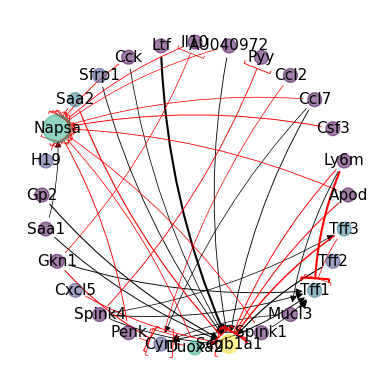

In [14]:
sp.pl.visualize_network(adata, 
                        'AT1-like', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_AT1like.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


There exist multiple connected components. Choose the parameter cc_id to show other components


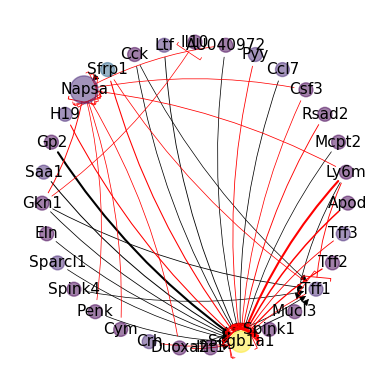

In [15]:
sp.pl.visualize_network(adata, 
                        'AT2-like', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_AT2like.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


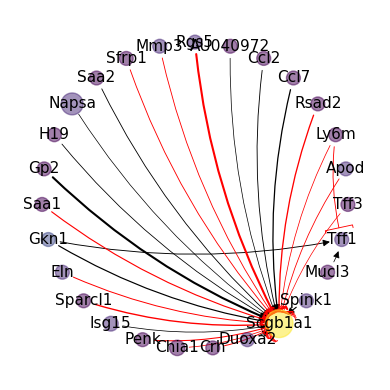

In [31]:
sp.pl.visualize_network(adata, 
                        'Lung progenitor-like', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.97, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_Lungprogenitorlike.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


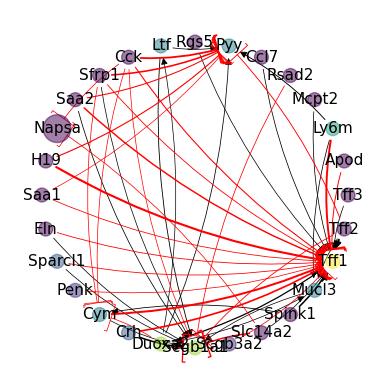

In [70]:
sp.pl.visualize_network(adata, 
                        'High plasticity', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.90, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_Highplasticity.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


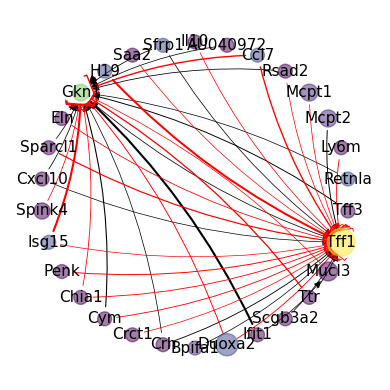

In [61]:
sp.pl.visualize_network(adata, 
                        'Pre-EMT', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_PreEMT.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


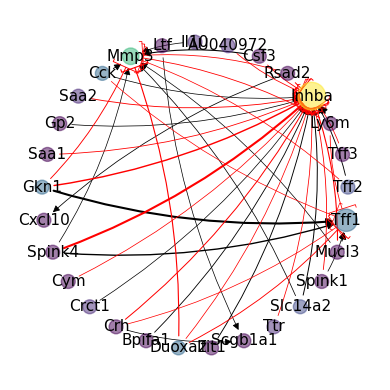

In [22]:
sp.pl.visualize_network(adata, 
                        'Early EMT-1', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_EarlyEMT1.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


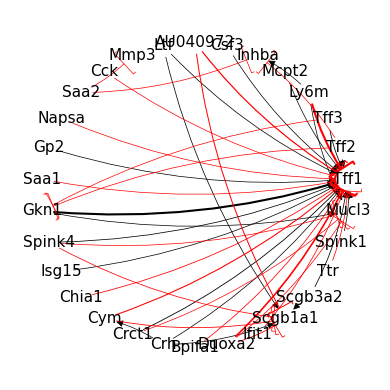

In [23]:
sp.pl.visualize_network(adata, 
                        'Early EMT-2', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_EarlyEMT2.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


There exist multiple connected components. Choose the parameter cc_id to show other components


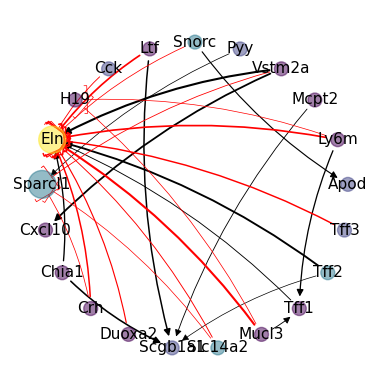

In [50]:
sp.pl.visualize_network(adata, 
                        'Mesenchymal-1', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_Mesenchymal1.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


There exist multiple connected components. Choose the parameter cc_id to show other components


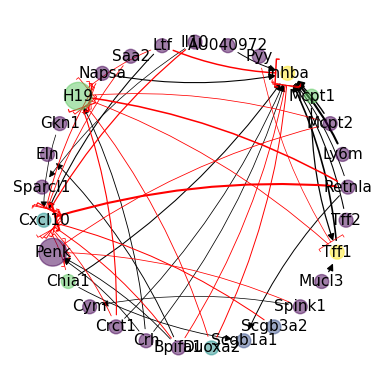

In [25]:
sp.pl.visualize_network(adata, 
                        'Mesenchymal-2', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_Mesenchymal2.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


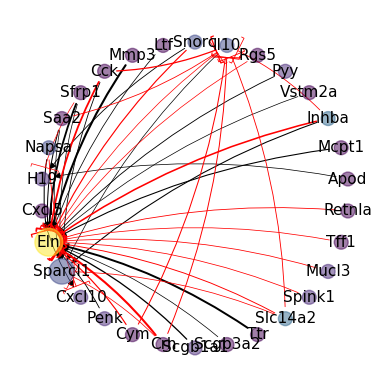

In [26]:
sp.pl.visualize_network(adata, 
                        'Mesenchymal-1 (Met)', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_Mesenchymal1_Met.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


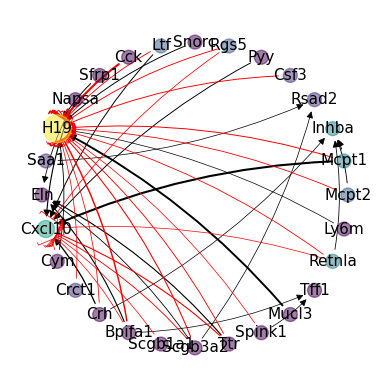

In [27]:
sp.pl.visualize_network(adata, 
                        'Mesenchymal-2 (Met)', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_Mesenchymal2_Met.pdf',
                        figsize=(4, 4))

In [ ]:
sp.pl.visualize_network(adata, 
                        'Mesenchymal-2 (Met)', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_Mesenchymal2_Met.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


There exist multiple connected components. Choose the parameter cc_id to show other components


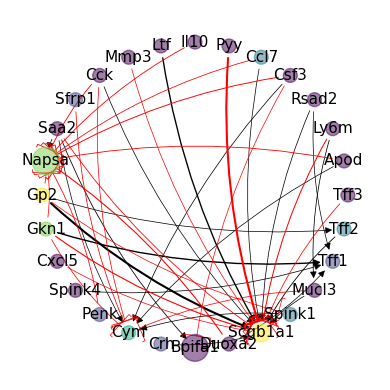

In [28]:
sp.pl.visualize_network(adata, 
                        'Early gastric', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_Earlygastric.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


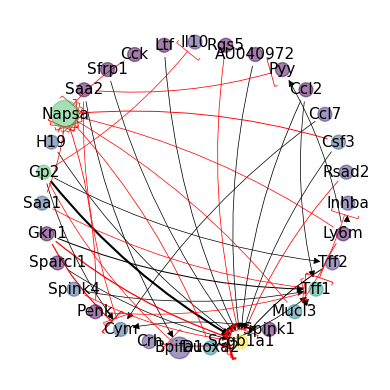

In [29]:
sp.pl.visualize_network(adata, 
                        'Gastric-like', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_Gastriclike.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


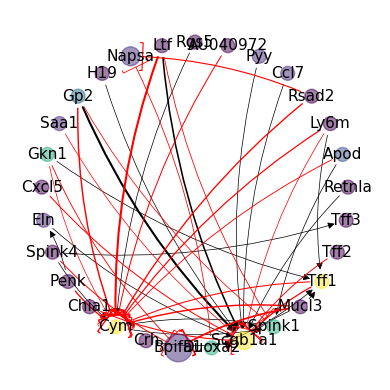

In [30]:
sp.pl.visualize_network(adata, 
                        'Late Gastric', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_LateGastric.pdf',
                        figsize=(4, 4))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


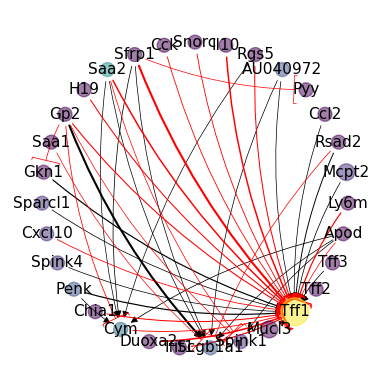

In [31]:
sp.pl.visualize_network(adata, 
                        'Endoderm-like', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.95, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_Endodermlike.pdf',
                        figsize=(4, 4))

In [32]:
adata_normal = anndata.read("/home/datadisk1/zlg/singlecell/EMT/PRJNA803321_2022cell/mergedloom_normal_AT2like.h5ad")
adata_normal

AnnData object with n_obs × n_vars = 495 × 32285
    obs: 'leiden_sub', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Mouse', 'Batch_Library', 'MetFamily', 'is_normal', 'leiden', 'Cluster_Name'
    uns: 'Cluster_Name_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [33]:
adata_normal.obs['clusters']=adata_normal.obs['Cluster_Name']
scv.pp.filter_genes(adata_normal, min_shared_counts=20)
scv.pp.normalize_per_cell(adata_normal)
scv.pp.filter_genes_dispersion(adata_normal, n_top_genes=2000)
scv.pp.log1p(adata_normal)

Filtered out 30016 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


/tmp/ipykernel_1979422/2782366856.py:5: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata_normal)


In [34]:
sp.tl.estimate_jacobian(adata_normal, n_top_genes=50)

Filtered out 1141 genes that are detected 20 counts (shared).
Extracted 50 highly variable genes.
Logarithmized X.
computing neighbors


/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/splicejac/tools/estimate_jacobian.py:300: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata)
/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is depre

    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Running quick regression...
Running subset regression on the Normal cluster...
Running subset regression on the AT2-like cluster...


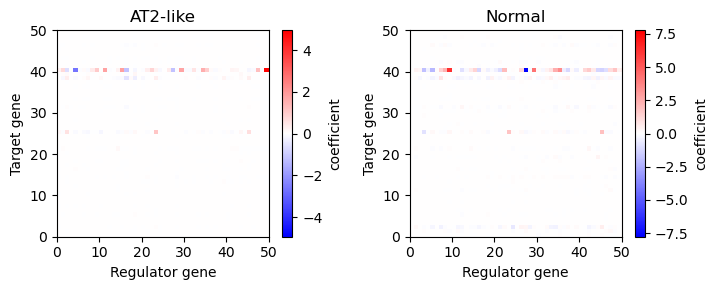

In [35]:
sp.pl.visualize_jacobian(adata_normal,
                         panel_height=3,
                         panel_length=3.5,
                         pan_per_row=4,
                         fontsize=10,
                         cmap='bwr',
                         #showfig=True,
                         savefig='normal_GRN_jacobian_bwr.pdf'
                         )

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


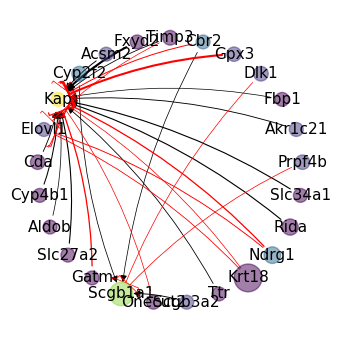

In [43]:
sp.pl.visualize_network(adata_normal, 
                        'AT2-like', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.97, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_normalAT2like.pdf',
                        figsize=(3.5, 3.5))

/home/wj/miniconda3/envs/spliceJAC/lib/python3.11/site-packages/networkx/convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


There exist multiple connected components. Choose the parameter cc_id to show other components


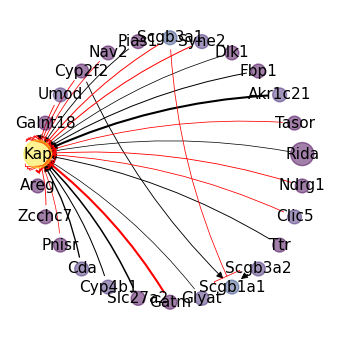

In [44]:
sp.pl.visualize_network(adata_normal, 
                        'Normal', 
                        node_size='expression', 
                        edge_width='weight',
                        font_size=11, 
                        weight_quantile=.97, 
                        node_color='centrality',
                        base_node_size=100,
                        diff_node_size=300, 
                        pos_edge_color='k', 
                        neg_edge_color='r', 
                        arrowsize=10, 
                        arrow_alpha=1, 
                        #conn_style='straight', 
                        conn_style='curved', 
                        colorbar=False, 
                        fontweight='normal',
                        pos_style='circle',
                        title=False,
                        plot_interactive=False,
                        #showfig=True,
                        savefig='GRN_Normal.pdf',
                        figsize=(3.5, 3.5))